In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt

In [51]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [52]:
init_notebook_mode(connected=True)
cf.go_offline()

In [53]:
df=pd.read_csv('MOTORSPIRIT.csv')

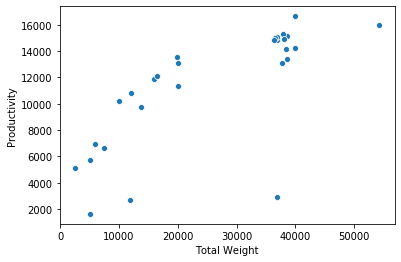

In [54]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [55]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0,28.000000,28.000000,28.000000,24.000000
mean,660.285714,194874.821429,46.237857,60.002143,25458.103500,0.255000,0.025500,0.0,0.333929,12.366786,11321.666071,40072.434750
std,1628.152074,4003.451539,58.461345,71.153461,14817.489985,0.148436,0.014844,0.0,1.130714,26.664774,4450.653723,7771.415965
min,26.000000,191249.000000,0.000000,0.000000,2498.383000,0.020000,0.002000,0.0,0.000000,0.000000,1624.550000,25701.000000
25%,295.500000,191976.750000,0.000000,0.000000,11950.917250,0.120000,0.012000,0.0,0.000000,0.000000,9031.132500,37018.250000
50%,350.000000,192493.000000,47.050000,56.265000,28191.272500,0.280000,0.028000,0.0,0.000000,0.000000,13115.790000,40651.000000
75%,458.500000,200307.250000,61.155000,73.787500,37975.164000,0.380000,0.038000,0.0,0.000000,10.020000,14889.257500,43705.000000
max,8948.000000,200922.000000,306.900000,337.750000,54257.130000,0.540000,0.054000,0.0,5.220000,120.500000,16648.620000,57289.000000


In [56]:
df=df[df['Productivity']>4000]
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.000000,25.000000,25.000000,21.000000
mean,354.720000,195160.560000,39.510400,53.692400,26364.554480,0.264000,0.026400,0.0,0.374000,12.754800,12392.417200,40344.687333
std,119.412632,4147.818383,28.082157,46.258466,14687.633664,0.147111,0.014711,0.0,1.192777,27.884911,3331.606326,8171.252385
min,26.000000,191249.000000,0.000000,0.000000,2498.383000,0.020000,0.002000,0.0,0.000000,0.000000,5124.890000,25701.000000
25%,285.000000,191925.000000,11.700000,19.750000,13758.939000,0.140000,0.014000,0.0,0.000000,0.000000,10790.820000,38048.000000
50%,345.000000,192582.000000,57.500000,58.580000,36382.545000,0.360000,0.036000,0.0,0.000000,0.000000,13393.120000,41338.000000
75%,458.000000,200329.000000,61.100000,70.800000,38076.549000,0.380000,0.038000,0.0,0.000000,6.700000,14956.420000,43990.000000
max,505.000000,200922.000000,81.650000,183.550000,54257.130000,0.540000,0.054000,0.0,5.220000,120.500000,16648.620000,57289.000000


In [57]:
df=df[df['Total Weight']<50000]
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0,24.000000,24.000000,24.000000,20.000000
mean,356.083333,194951.750000,37.754583,52.481667,25202.363833,0.252500,0.025250,0.0,0.389583,13.286250,12244.259167,39497.471700
std,121.782028,4100.607413,27.248331,46.847009,13779.357157,0.138321,0.013832,0.0,1.215829,28.355028,3318.066065,7376.784682
min,26.000000,191249.000000,0.000000,0.000000,2498.383000,0.020000,0.002000,0.0,0.000000,0.000000,5124.890000,25701.000000
25%,279.500000,191909.500000,8.775000,14.812500,13309.161500,0.135000,0.013500,0.0,0.000000,0.000000,10646.307500,37018.250000
50%,358.500000,192493.000000,47.050000,56.265000,28191.272500,0.280000,0.028000,0.0,0.000000,0.000000,13254.975000,40348.000000
75%,458.500000,200335.500000,59.975000,70.447500,37975.164000,0.380000,0.038000,0.0,0.000000,10.020000,14889.257500,43705.000000
max,505.000000,200922.000000,69.230000,183.550000,39887.326000,0.400000,0.040000,0.0,5.220000,120.500000,16648.620000,50776.000000


In [58]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [59]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
print(lm.intercept_)

7107.118510376642


In [61]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.210188


In [62]:
predictions = lm.predict(X_test)

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 1280.7453011483049
MSE: 2601810.5973317027
RMSE: 1613.012894347625
r2_score: 0.8727622520097953


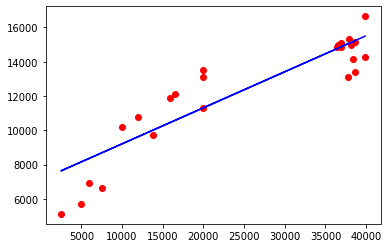

In [64]:
plt.scatter(X,y, color='red')
plt.plot(X_test, predictions,color="blue")

In [65]:
joblib.dump(lm,"Motor_Spirit.pkl")#only execute if rmse is less than half of mean of productivity

['Motor_Spirit.pkl']